In [32]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

In [20]:
dataset = pd.read_csv('Crop_recommendation.csv') # to import the dataset into a variable
# Splitting the attributes into independent and dependent attributes
X = dataset.iloc[:, :-1].values # attributes to determine dependent variable / Class
Y = dataset.iloc[:, -1].values # dependent variable / Class

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size = 0.2, random_state = 42)

In [22]:
rforest = RandomForestClassifier()
rforest.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
# Make Predictions
y_pred_proba = rforest.predict_proba(X_test)
y_pred = rforest.predict(X_test)

Text(0.5, 15.0, 'Predicted')

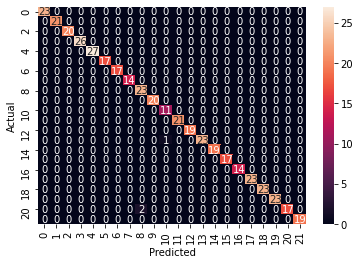

In [24]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [25]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
 

In [39]:
print('Precision: %.3f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average='macro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred, average='macro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.993
Recall: 0.993
F1 Score: 0.993
Accuracy: 0.993


In [26]:
# N	P	K	temperature	humidity	ph	rainfall
features = [111, 19, 56, 27.4, 83.7, 6.4, 68]

In [29]:
features = np.array(features)
features = features.reshape(1, -1)
rforest.predict(features)

array(['watermelon'], dtype=object)

In [30]:
filename = 'finalized_model.model'
# Dump the file
pickle.dump(rforest, open(filename, 'wb'))

In [40]:
a = rforest.predict(features)
a[0]

'watermelon'

In [42]:
import sklearn
sklearn.__version__

'0.24.1'

In [43]:
filename = 'finalized_model.pkl'
# Dump the file
pickle.dump(rforest, open(filename, 'wb'))